# YayYay Data Analysis

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt

In [5]:
os.chdir('C:/my_working_env/deeplearning_practice/paytest')

Load the datasets, and merge into a single dataframe.

In [6]:
transactions = pd.read_csv('yayyay_data/transactions.csv')
users =  pd.read_csv('yayyay_data/users.csv')
stores = pd.read_csv('yayyay_data/stores.csv')

In [7]:
df = pd.merge( transactions, users, left_on='user_id', right_on='id', how='left')
df = pd.merge( df, stores, left_on='store_id', right_on='id', how='left')

df.drop(columns=['id_x', 'id_y', 'id'], axis=1, inplace=True )
#df = pd.get_dummies( df, columns=['gender', 'nam', 'laa', 'category', ] )

In [8]:
df['event_occurrence'] = pd.to_datetime( df.event_occurrence )
df.sort_values( by='event_occurrence', inplace=True )
df['year'] = df['event_occurrence'].dt.year
df['month_year'] = df['event_occurrence'].dt.to_period('M')

In [9]:
df.head(5)

,user_id,store_id,event_occurrence,amount,gender,age,nam,laa,category,lat,lon,year,month_year
0,93098549-3ff0-e579-01c3-df9183278f64,a3c7874b-75df-9cf2-62ab-cf58be5d9e0e,2020-01-01 06:40:43.323987,315,M,88.0,Saitama Ken,Soka Shi,コンビニ,35.830649,139.809781,2020,2020-01
1,35ba9da1-98d0-cbb7-7844-e648601b7208,1d59adf3-94f2-f5f8-46c6-8558c544a3a9,2020-01-01 07:04:25.968615,1646,M,44.0,Gunma Ken,Meiwa Cho,ショッピング,36.216801,139.562541,2020,2020-01
2,63cb5ee0-a457-9975-5455-4d76109bc754,c835f09d-ac5b-2005-1959-f452456a746a,2020-01-01 07:06:16.164563,385,M,16.0,Hiroshima Ken,Fukuyama Shi,コンビニ,34.642260,133.257595,2020,2020-01
3,786fcb82-40cf-1dc9-b9ba-2541502ca95a,eaf4c05d-13e1-7c8a-9ae0-cf2ec2e3dcd2,2020-01-01 07:07:26.029685,166,F,79.0,Tokyo To,Nerima Ku,グルメ,35.762485,139.661923,2020,2020-01
4,acc814f5-beb6-db35-64f1-52f7c5a8466c,a8301ae2-df3b-ffe4-0279-c74af1dbb847,2020-01-01 07:12:24.448015,656,F,79.0,Tokyo To,Edogawa Ku,スーパーマーケット,35.692503,139.863613,2020,2020-01


### Part 1: Data Analysis

* Graph below is the sum of the **amount** for each month.  The sum seems to increase exponentially.

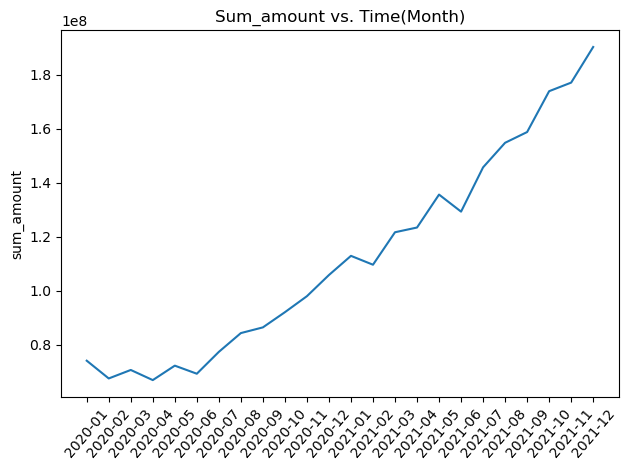

In [10]:
sum_vs_time = df[['amount','month_year']].groupby(['month_year'], as_index=False).sum()
sum_vs_time['month_year'] = sum_vs_time['month_year'].astype(str)
plt.plot( sum_vs_time.month_year.values, sum_vs_time.amount )
plt.xticks(rotation=50); plt.ylabel('sum_amount'); plt.title('Sum_amount vs. Time(Month)'); plt.tight_layout()
plt.show()

* Graph below is the number of unique IDs for each month.  The unique IDs increases also rapidly.

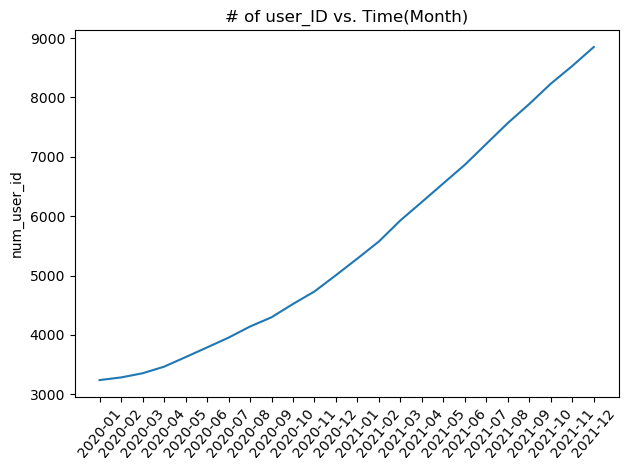

In [11]:
num_vs_time = df[['user_id', 'month_year']].groupby(['month_year'], as_index=False).nunique()
num_vs_time['month_year'] = num_vs_time['month_year'].astype(str)
plt.plot( num_vs_time.month_year.values, num_vs_time.user_id ) 
plt.xticks(rotation=50); plt.ylabel('num_user_id'); plt.title('# of user_ID vs. Time(Month)'); plt.tight_layout()
plt.show()

* Histogram showing the age distribution.  The number of users are present for all ages. 

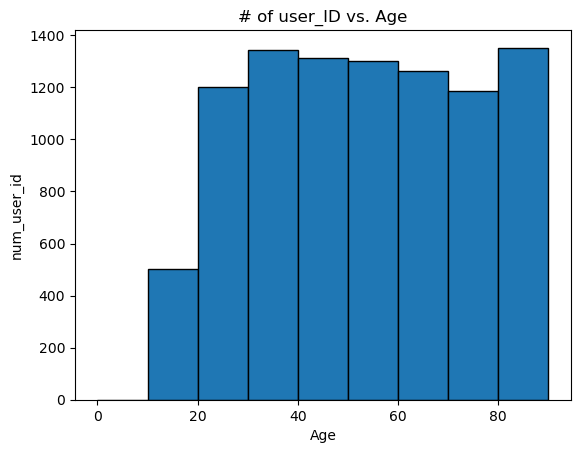

In [12]:
plt.hist( users['age'], bins=np.arange(0,100,10), density=False, edgecolor='black' )
plt.xlabel('Age'); plt.ylabel('num_user_id'); plt.title('# of user_ID vs. Age'); plt.show(); plt.close()

* Graph showing the number of unique IDs for each prefectures.  **Tokyo-to** is the highest.

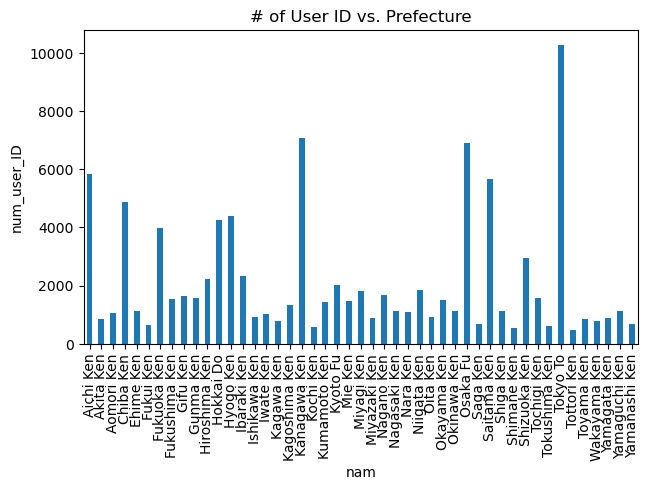

In [13]:
stores[['id','nam']].groupby(['nam']).nunique().plot.bar(legend=False)
plt.tight_layout(); plt.ylabel('num_user_ID'); plt.title('# of User ID vs. Prefecture'); plt.show(); plt.close()

* Graph showing the number of unique IDs for each categories.  その他 is highest.  

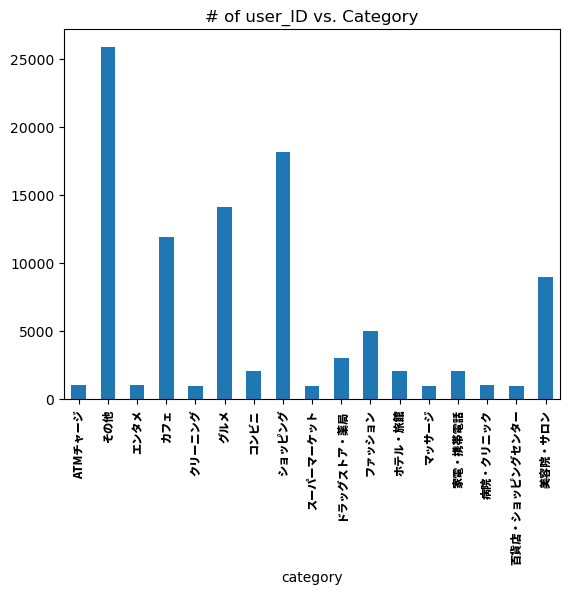

In [14]:
import matplotlib.font_manager as fm
fprop = fm.FontProperties(fname='C:/my_working_env/deeplearning_practice/paytest/yayyay_data/japanese_font/static/NotoSansJP-Black.ttf')
ax = stores[['id','category']].groupby(['category']).nunique().plot.bar(legend=False)
#ax.set_xlabel('カテゴリ', fontproperties=fprop)
plt.xticks( fontproperties=fprop, fontsize=8, rotation=90); plt.title('# of user_ID vs. Category'); plt.show()

* Pie chart showing the percentage for gender.  0.2% indicates unknown.

Text(0.5, 1.0, 'Gender Distribution')

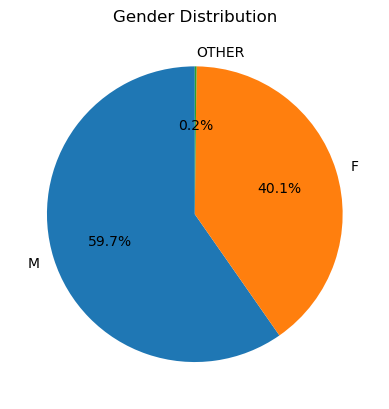

In [15]:
gender_counts = users['gender'].value_counts()
fig, ax = plt.subplots()
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Gender Distribution')

* Histogram showing the number of users and the amount spent per one transaction.

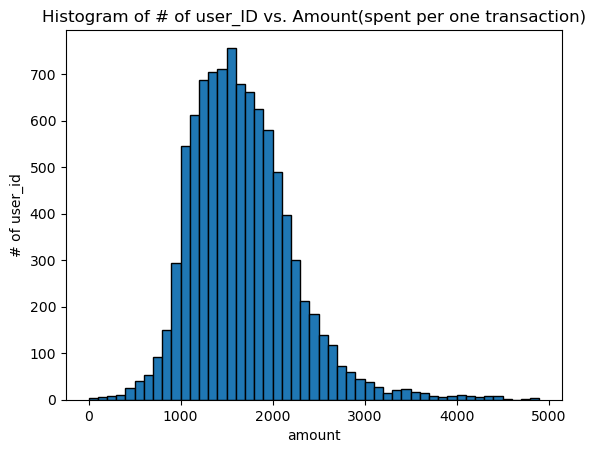

In [16]:
plt.hist( df[['user_id','amount']].groupby(['user_id']).mean(), bins=np.arange(0,5000,100), edgecolor='black' ) 
plt.title('Histogram of # of user_ID vs. Amount(spent per one transaction)'); plt.xlabel('amount'); 
plt.ylabel('# of user_id'); plt.show(); plt.close()

* Graph showing the average amount spent for each month.  

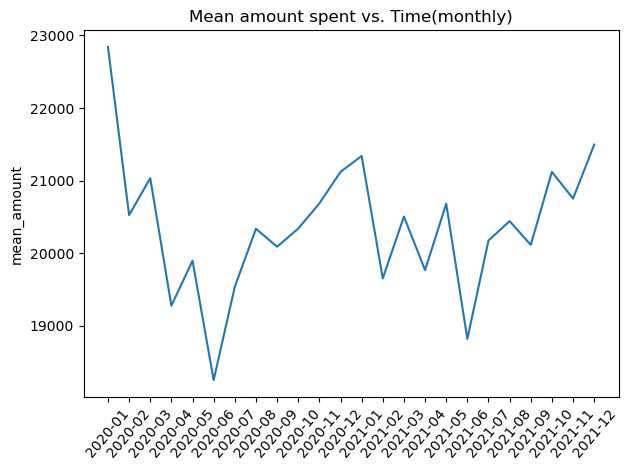

In [17]:
monthly_df = df[['user_id','amount','month_year']].groupby(['user_id','month_year'], as_index=False).sum()
mean_vs_time = monthly_df[['amount','month_year']].groupby(['month_year'], as_index=False).mean()
mean_vs_time['month_year'] = mean_vs_time['month_year'].astype(str)
plt.plot( mean_vs_time.month_year.values, mean_vs_time.amount )
plt.xticks(rotation=50); plt.ylabel('mean_amount'); plt.title('Mean amount spent vs. Time(monthly)'); plt.tight_layout()
plt.show()

### Part 2: Prediction model for each users.

A model that will predict the amount spent for the month of Jan. 2022.  The details are as follow:

1. The model uses **amount** as an input data. 
2. The input data is aggregated to monthly sum of amount for each users.  so each time step represents one month. 
2. This is a sequential model.  It uses the past 10 month of **amount** as an input to predict the next month. 
3. The model uses an encoder transformer architecture shown later.      

First, prepare the input data.  The input data has dimensions NxTxD where N=number of batches, T=sequence length(10), and D=number of featues(1).  

In [41]:
# Aggregate the data to monthly.
monthly_df = df[['user_id','amount','month_year']].groupby(['user_id','month_year'], as_index=False).sum()

# Standardize the input data using z-score method.
avg_amount = monthly_df.amount.mean()  
std_amount = monthly_df.amount.mean()
monthly_df['amount_norm'] = (monthly_df.amount - avg_amount)/std_amount

T = 10  # Number of sequence length.
D = 1   # Number of features.

X = []
Y = []
for n, id in enumerate(users.id.values):
    if n%1000==0:
        print(f" {str(n)} Ids finished.")

    user_df = monthly_df.loc[ monthly_df.user_id==id ]
    num_month = len(user_df)
    amounts = user_df.amount_norm.values
    if num_month>T:
        for t in range(num_month - T):
            x = amounts[t:t+T]
            X.append(x)
            y = amounts[t+T]
            Y.append(y)

X = np.array(X).reshape(-1, T, D)    # make it NxTxD.  
Y = np.array(Y)

 0 Ids finished.
 1000 Ids finished.
 2000 Ids finished.
 3000 Ids finished.
 4000 Ids finished.
 5000 Ids finished.
 6000 Ids finished.
 7000 Ids finished.
 8000 Ids finished.
 9000 Ids finished.


Shuffle and split the data into train and test datasets.

In [37]:
# shuffle the order of batch data.
import random
num_data = len(X)
train_indices = random.sample( range(num_data), k=int(num_data*0.9)  )
test_indices = list(set([*range(0,num_data)]) - set(train_indices))

x_train = X[train_indices]
y_train = Y[train_indices]
x_test = X[test_indices]
y_test = Y[test_indices]

The transformer model is shown below. Positional encoding, 3 transformers, and Pooling/Dense layers, where the transformer consists of a multi-head attention layer and a convolution layer.  The output yields t+1 prediction.

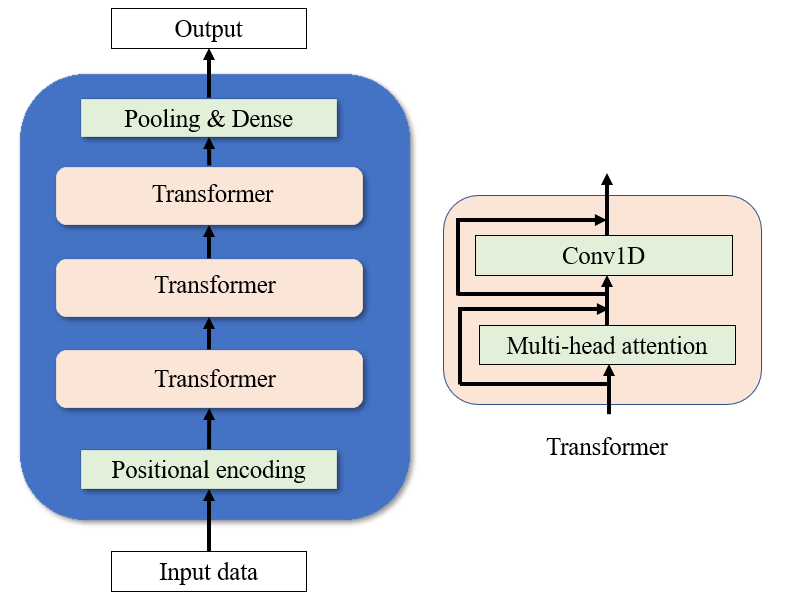

In [20]:
from IPython.display import Image
Image(filename='C:/my_working_env/deeplearning_practice/paytest/transformer.png')

Creating the transformer class using tensorflow.

In [21]:
class transformer(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        
        head_size = 64
        num_heads = 4
        num_filter = 4
        dropout = 0.1
                
        self.layer_norm = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        self.mha = tf.keras.layers.MultiHeadAttention(
                                                    key_dim=head_size, 
                                                    num_heads=num_heads, 
                                                    dropout=dropout,
                                                    )

        self.dropout = tf.keras.layers.Dropout(dropout)
        self.conv1D = tf.keras.layers.Conv1D(filters=num_filter, kernel_size=1, activation="relu",)
        self.conv1D_2 = tf.keras.layers.Conv1D(filters=D, kernel_size=1) 
        
    def call(self, x):
        inputs = x
        x = self.mha(x,x)
        x = self.dropout(x)
        res = x + inputs

        x = self.conv1D(res)
        x = self.dropout(x)
        x = self.conv1D_2(x)
        return x + res
        
        
class transformer_model(tf.keras.Model):
    def __init__(self, T, D):
        super().__init__()
        
        self.num_transformer = 3
        dense_units = 64
        dropout = 0.1
        
        self.pooling = tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")
        
        self.dense_layer = tf.keras.layers.Dense(dense_units, activation="relu")
        self.dropout = tf.keras.layers.Dropout(dropout)
        self.transformer_layer = transformer()
        self.output_layer = tf.keras.layers.Dense(D) 
        self.pos_encoding = self.positional_encoding( T, D )

    def positional_encoding(self, length, depth):
        depth = depth/2
        positions = np.arange(length)[:, np.newaxis] 
        depths = np.arange(depth)[np.newaxis, :]/depth  

        angle_rates = 1 / (10000**depths)  
        angle_rads = positions * angle_rates

        pos_encoding = np.concatenate(
                                      [np.sin(angle_rads), np.cos(angle_rads)],
                                      axis=-1) 
                                      
        pos_encoding = pos_encoding.reshape( -1, pos_encoding.shape[0], pos_encoding.shape[1] )   
        return tf.cast(pos_encoding, dtype=tf.float32)

    def call(self, inputs):
        
        x = inputs # inputs needs to be NxTxD dimension.
        x = tf.keras.layers.Add()([x, self.pos_encoding]) 
        
        for _ in range(self.num_transformer):  
            x = self.transformer_layer(x)
        
        x = self.pooling(x)  # Reduce dimension from NxTxD to NxT.  
        x = self.dense_layer(x)
        x = self.dropout(x)
        outputs = self.output_layer(x)
        
        return outputs


Compile and train.

In [40]:
model = transformer_model(T,D)  

model.compile(
            loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.Adam( learning_rate=0.001 ),
            )

res = model.fit(
        x_train,
        y_train,
        validation_split=0.2,
        epochs=5000,
        batch_size=512,
        callbacks=[rlr, es],
        )


Epoch 1/5000
79/79 [==============================] - 13s 138ms/step - loss: 1.0604 - val_loss: 0.9688 - lr: 0.0010
Epoch 2/5000
79/79 [==============================] - 11s 135ms/step - loss: 1.0015 - val_loss: 0.9530 - lr: 0.0010
Epoch 3/5000
79/79 [==============================] - 10s 133ms/step - loss: 0.9867 - val_loss: 0.9511 - lr: 0.0010
Epoch 4/5000
79/79 [==============================] - 10s 133ms/step - loss: 0.9843 - val_loss: 0.9483 - lr: 0.0010
Epoch 5/5000
79/79 [==============================] - 11s 135ms/step - loss: 0.9778 - val_loss: 0.9468 - lr: 0.0010
Epoch 6/5000
79/79 [==============================] - 11s 145ms/step - loss: 0.9761 - val_loss: 0.9466 - lr: 0.0010
Epoch 7/5000
79/79 [==============================] - 11s 142ms/step - loss: 0.9728 - val_loss: 0.9461 - lr: 0.0010
Epoch 8/5000
79/79 [==============================] - 11s 145ms/step - loss: 0.9729 - val_loss: 0.9464 - lr: 0.0010
Epoch 9/5000
79/79 [==============================] - 11s 139ms/step - l

Epoch 71/5000
79/79 [==============================] - 11s 137ms/step - loss: 0.9583 - val_loss: 0.9379 - lr: 1.0000e-04
Epoch 72/5000
79/79 [==============================] - 11s 138ms/step - loss: 0.9581 - val_loss: 0.9375 - lr: 1.0000e-04
Epoch 73/5000
79/79 [==============================] - 11s 138ms/step - loss: 0.9580 - val_loss: 0.9374 - lr: 1.0000e-04
Epoch 74/5000
79/79 [==============================] - 11s 139ms/step - loss: 0.9585 - val_loss: 0.9374 - lr: 1.0000e-04
Epoch 75/5000
79/79 [==============================] - 11s 140ms/step - loss: 0.9581 - val_loss: 0.9376 - lr: 1.0000e-04
Epoch 76/5000
79/79 [==============================] - 11s 137ms/step - loss: 0.9585 - val_loss: 0.9379 - lr: 1.0000e-04
Epoch 77/5000
79/79 [==============================] - 11s 137ms/step - loss: 0.9576 - val_loss: 0.9376 - lr: 1.0000e-04
Epoch 78/5000
79/79 [==============================] - 12s 146ms/step - loss: 0.9584 - val_loss: 0.9375 - lr: 1.0000e-04
Epoch 79/5000
79/79 [===========

Plot the training loss & validation loss.

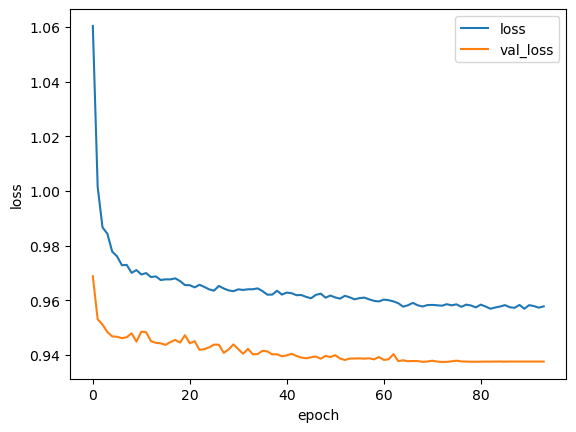

In [42]:
plt.plot( res.history['loss'], label='loss' ) 
plt.plot( res.history['val_loss'], label='val_loss' ) 
plt.legend(); plt.xlabel('epoch'); plt.ylabel('loss'); plt.show()

In [51]:
model.evaluate( x_test, y_test )

176/176 [==============================] - 1s 6ms/step - loss: 0.7689


0.7689315676689148

Pick a random user ID and plot its monthly amount including the prediction in the month of Jan. 2022.

Note: The model requries a sequence of 10 month as an input.  If the users whose record has less than 10 month, it will not be plotted.

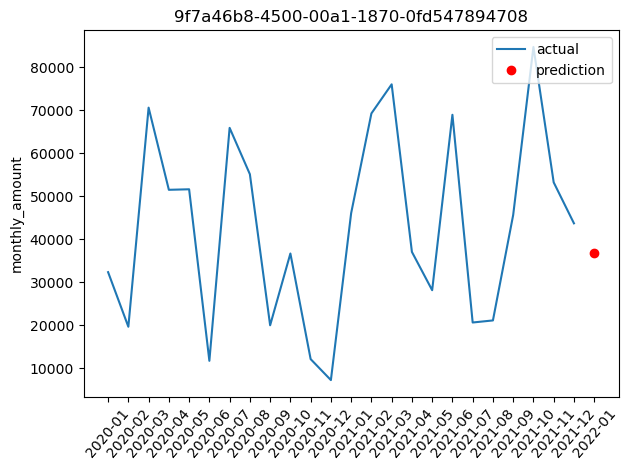

In [48]:
# Get random ID.
random_id = users.iloc[ random.randint(0,len(users)) ].id

# Get monthly data for the random ID.
user_df_monthly = monthly_df.loc[ monthly_df.user_id==random_id ].copy()

# Check if the user has more than 10 months of records.
if len(user_df_monthly)>=T:
    last_amount = user_df_monthly.amount.values[-T:]
    x = (last_amount[ np.newaxis, :, np.newaxis]-avg_amount)/std_amount 
    prediction = model.predict(x, verbose=False)[0,0]*std_amount+avg_amount

    user_df_monthly['month_year'] = user_df_monthly['month_year'].astype(str)
    plt.plot( user_df_monthly.month_year.values, user_df_monthly.amount.values, label='actual' );
    plt.xticks(rotation=50); plt.ylabel('monthly_amount'); plt.title(random_id); plt.tight_layout();
    plt.plot( '2022-01', prediction, 'ro', label='prediction' ); plt.legend(loc='upper right'); plt.show()
else:
    print(f" ID = {random_id} is not a member for more than {str(T)} months!! ")
    

### Part 3: Prediction model for the whole users.

The graph below shows the daily amount spent by the whole users.

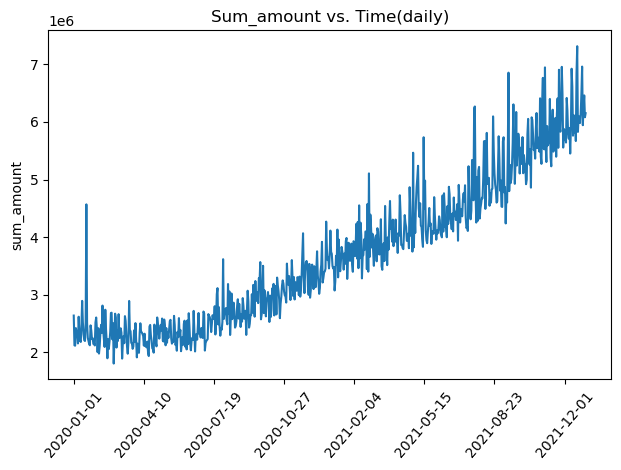

In [25]:
df['day'] = df['event_occurrence'].dt.to_period('D')

sum_vs_time = df[['amount','day']].groupby(['day'], as_index=False).sum()
sum_vs_time['day'] = sum_vs_time['day'].astype(str)
plt.plot( sum_vs_time.day.values, sum_vs_time.amount )
plt.xticks(rotation=50); plt.ylabel('sum_amount'); plt.title('Sum_amount vs. Time(daily)'); plt.tight_layout()
plt.xticks(np.arange(0, len(sum_vs_time)+1, 100));  
plt.show()

Create a model with a simple dense layer.

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Prepare inputs and targets.
X2 = np.arange(0,len(sum_vs_time))
X2 = X2[:,np.newaxis]
Y2 = sum_vs_time.amount.values

scalerX = MinMaxScaler().fit(X2)
scalerY = MinMaxScaler().fit(Y2[:,np.newaxis])
x_train2 = scalerX.transform(X2)
y_train2 = scalerY.transform(Y2[:,np.newaxis])

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=[1]),  
    tf.keras.layers.Dense(1)
])

model2.compile(optimizer='adam', loss='mse')
model2.fit(x_train2, y_train2, epochs=100,  verbose=1, )


Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 0.0819
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 11/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 12/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 13/100
23/23 [=================

Plot the actual amount, the predictions in Jan.2022, and the result from the training data.  

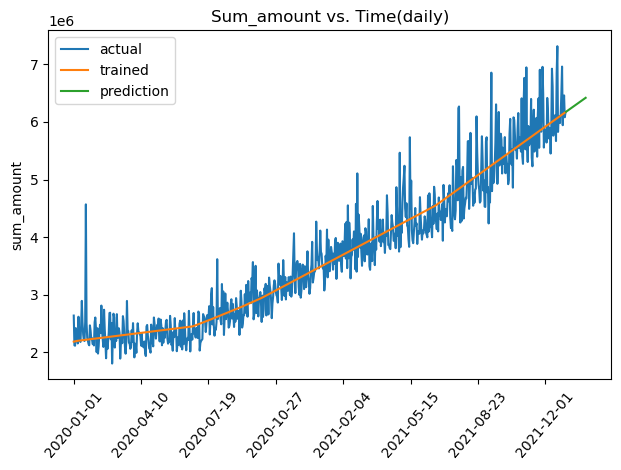

In [27]:
# Plot the training results.
daily_outputs = model2.predict(x_train2, verbose=False)
daily_outputs = scalerY.inverse_transform(daily_outputs)

# plot the actuall sum_amount.
plt.plot( sum_vs_time.day.values, sum_vs_time.amount, label='actual' )
plt.xticks(rotation=50); plt.ylabel('sum_amount'); plt.title('Sum_amount vs. Time(daily)'); plt.tight_layout()
plt.xticks(np.arange(0, len(sum_vs_time)+1, 100));  
plt.plot( daily_outputs, label='trained'); 

# Prediction inputs and outputs.
X3 = np.arange(731,761)
x_test2 = scalerX.transform( X3[:,np.newaxis] )
total_pred = scalerY.inverse_transform( model2.predict( x_test2, verbose=False ) )

# Get x-axis label for Jan. 2022.
Jan2022 = []
for n in range(30):
    if n<9:
        Jan2022.append('2022-01-0' + str(n+1))
    else:
        Jan2022.append('2022-01-' + str(n+1))

plt.plot( Jan2022, total_pred, label='prediction'); plt.legend(loc='upper left')
plt.show()

Saving the results. 
* **total_amount_prediction.csv** shows the total daily amount spent in the month of Jan. 2022.
* **user_amount_prediction.csv** shows total amount spent in the month of Jan. 2022 for each users.

**Note:** The current model requries a sequence of 10 month as an input. For this reason, users with less than 10 months of records are replaced with amount=20000 (roughly the average amount for the whole users).

In [49]:
total_amount_df = pd.DataFrame( {'date':Jan2022, 'total_amount_predicted':np.squeeze(total_pred)} ) 
total_amount_df.to_csv('C:/my_working_env/deeplearning_practice/paytest/total_amount_prediction.csv')

user_pred_list = []
for n, id in enumerate(users.id.values):
    
    if n%1000==0:
        print(f" {str(n)} Ids finished.")
        
    user_df_monthly = monthly_df.loc[ monthly_df.user_id==id ].copy()
    num_month_member = len(user_df_monthly)
    
    if len(user_df_monthly)>=T:
        last_amount = user_df_monthly.amount.values[-T:]
        x = (last_amount[ np.newaxis, :, np.newaxis]-avg_amount)/std_amount 
        user_pred = model.predict(x, verbose=False)[0,0]*std_amount+avg_amount
        user_pred_list.append(user_pred)
    else:
        user_pred_list.append(20000)  
        
user_amount_df = pd.DataFrame( {'user_ID':users.id.values, 'prediction_Jan2022':user_pred_list} )
user_amount_df.to_csv('C:/my_working_env/deeplearning_practice/paytest/user_amount_prediction.csv')

 0 Ids finished.
 1000 Ids finished.
 2000 Ids finished.
 3000 Ids finished.
 4000 Ids finished.
 5000 Ids finished.
 6000 Ids finished.
 7000 Ids finished.
 8000 Ids finished.
 9000 Ids finished.
